The community of Earlwood is concerned about air quality in the area. The local council wants to have the ability to know in advance about the air quality in terms of ozone, NO, NO2 and microparticles using wheather forecasts and if possible to be given tools and insight into what policy recommendations to make to improve air qualitys. The council has made available weather (wind speed and direction, temperature, humidity) and air pollutant concentrations data (Ozone, NO, NO2, PM2.5, PM10) taken in Earlwood 2017.

In [2]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import pandas as pd
import missingno as msno

We first import the data and shorten the names for cosmetic reasons and check what the variables are:<br>
**date** and **time** are self explanatory <br>
**wdr**: hourly averaged wind direction in degrees <br>
**temp**: hourly averaged temperature in C <br>
**wsp**: hourly averaged wind speed in m/s <br>
**NO**, **NO2**, **ozone**: hourly averaged concentration of these compounds in pphm <br>
**CO**: hourly averaged concentration of CO in ppm <br>
**PM2.5** and **PM10**: Fraction of particles with an aerodynamic diameter <= 2.5/10 um in ug/m3 <br>
**humid**: humidity in % <br>
**SD1**: hourly averaged sigma-theta (standard deviation of horizontal component of the wind) in degrees <br>
**ozone_4h**: 4h averaged ozone concentration in pphm <br>
**CO_8h**: 8h averaged CO concentration in ppm <br>


In [3]:
airqual=pd.read_excel("Earlwood_Air_Data_17_18.xls")

In [4]:
names_ini=airqual.columns
names_new=['date', 'time', 'wdr', 'temp', 'wsp', 'NO', 'NO2', 'CO', 'ozone', 'ozone_4h', 'PM10', 'PM2.5', 'humid', 'SD', 'CO_8h']

In [5]:
for i in range(len(names_ini)):
    airqual.rename(columns={names_ini[i]:names_new[i]}, inplace=True)

We then explore the data and look at missing values and correlations

In [6]:
airqual

,date,time,wdr,temp,wsp,NO,NO2,CO,ozone,ozone_4h,PM10,PM2.5,humid,SD,CO_8h
0,01/01/2017,01:00,152.3,22.6,0.4,0.0,0.4,NaN,2.0,2.1,23.6,7.0,87.2,49.01,NaN
1,01/01/2017,02:00,134.0,22.6,0.3,NaN,NaN,NaN,NaN,2.2,21.0,6.6,87.2,46.56,NaN
2,01/01/2017,03:00,132.2,22.6,0.3,0.0,0.6,NaN,1.7,2.0,20.0,7.2,87.0,47.40,NaN
3,01/01/2017,04:00,125.8,22.7,0.2,0.0,0.5,NaN,1.7,1.8,21.4,7.1,87.2,53.70,NaN
4,01/01/2017,05:00,107.9,22.8,0.6,0.0,0.3,NaN,2.1,1.8,21.5,4.3,86.8,41.65,NaN
5,01/01/2017,06:00,107.5,23.0,0.5,0.0,0.3,NaN,2.1,1.9,23.5,8.6,85.7,40.73,NaN
6,01/01/2017,07:00,107.0,23.6,0.5,0.0,0.3,NaN,2.5,2.1,16.8,5.9,80.2,44.78,NaN
7,01/01/2017,08:00,53.8,24.3,0.4,0.0,0.3,NaN,3.0,2.4,16.5,8.0,74.9,62.95,NaN
8,01/01/2017,09:00,67.4,24.6,0.4,0.0,0.5,NaN,2.7,2.6,19.9,7.8,74.8,65.95,NaN
9,01/01/2017,10:00,100.9,25.2,1.0,0.0,0.5,NaN,2.7,2.7,20.3,6.0,73.5,46.92,NaN


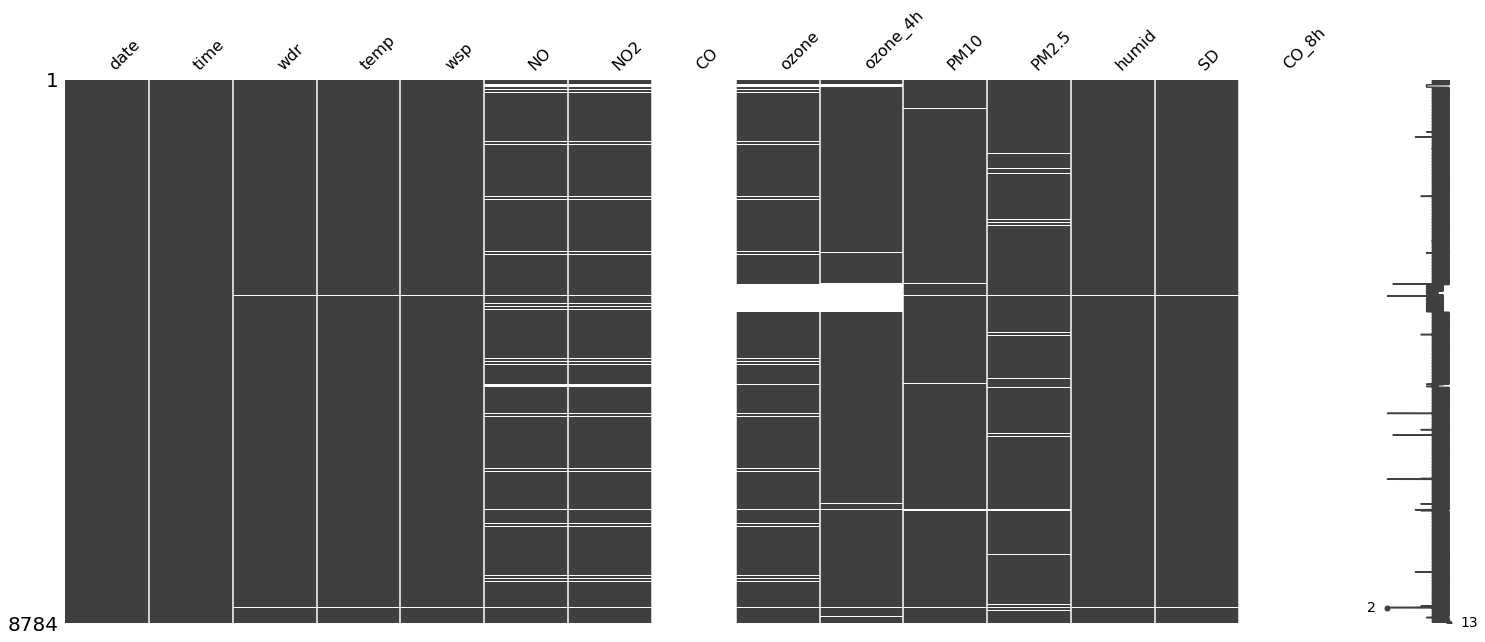

In [7]:
msno.matrix(airqual)

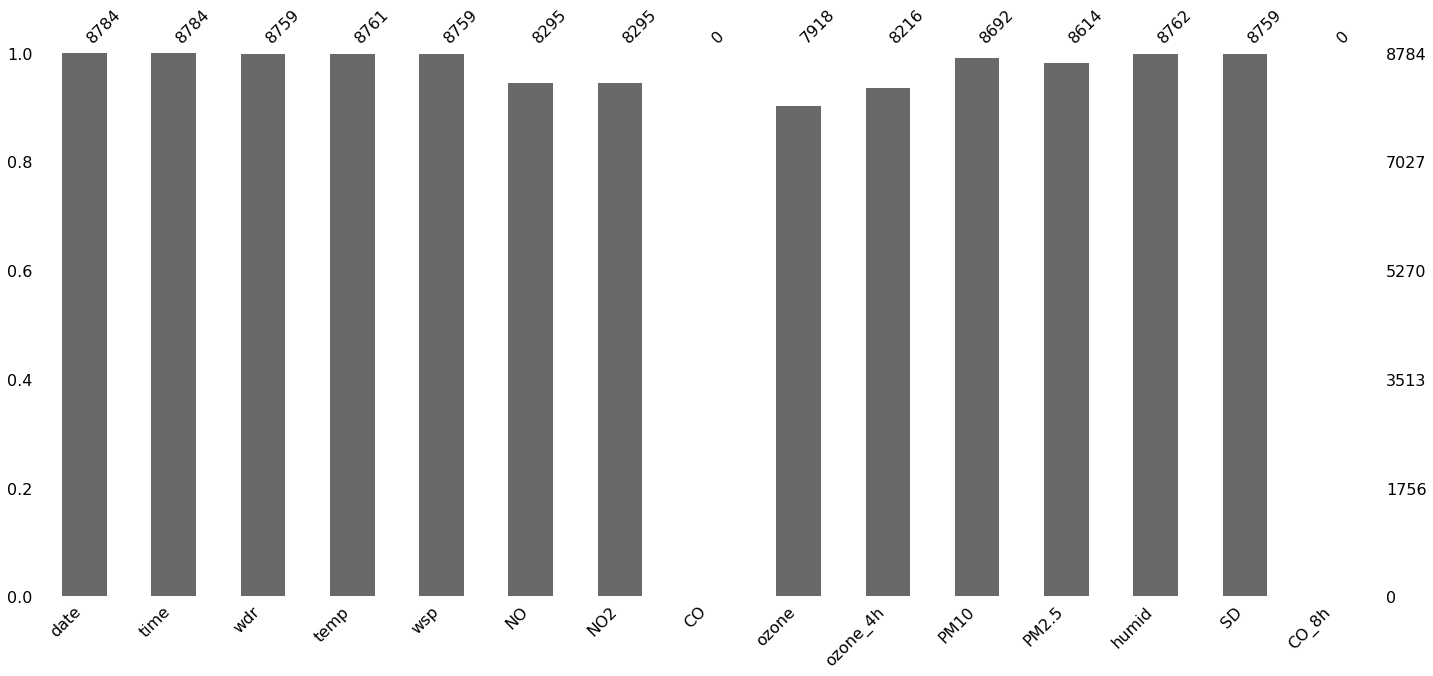

In [8]:
msno.bar(airqual)

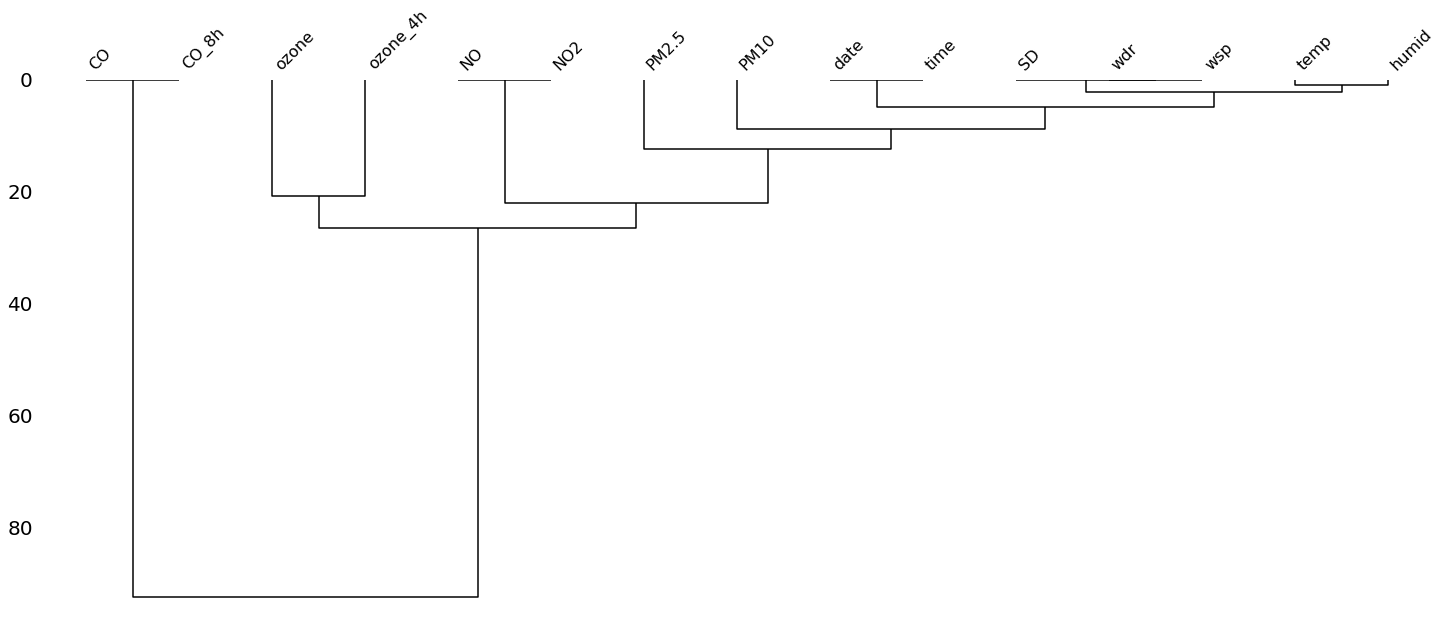

In [9]:
msno.dendrogram(airqual)

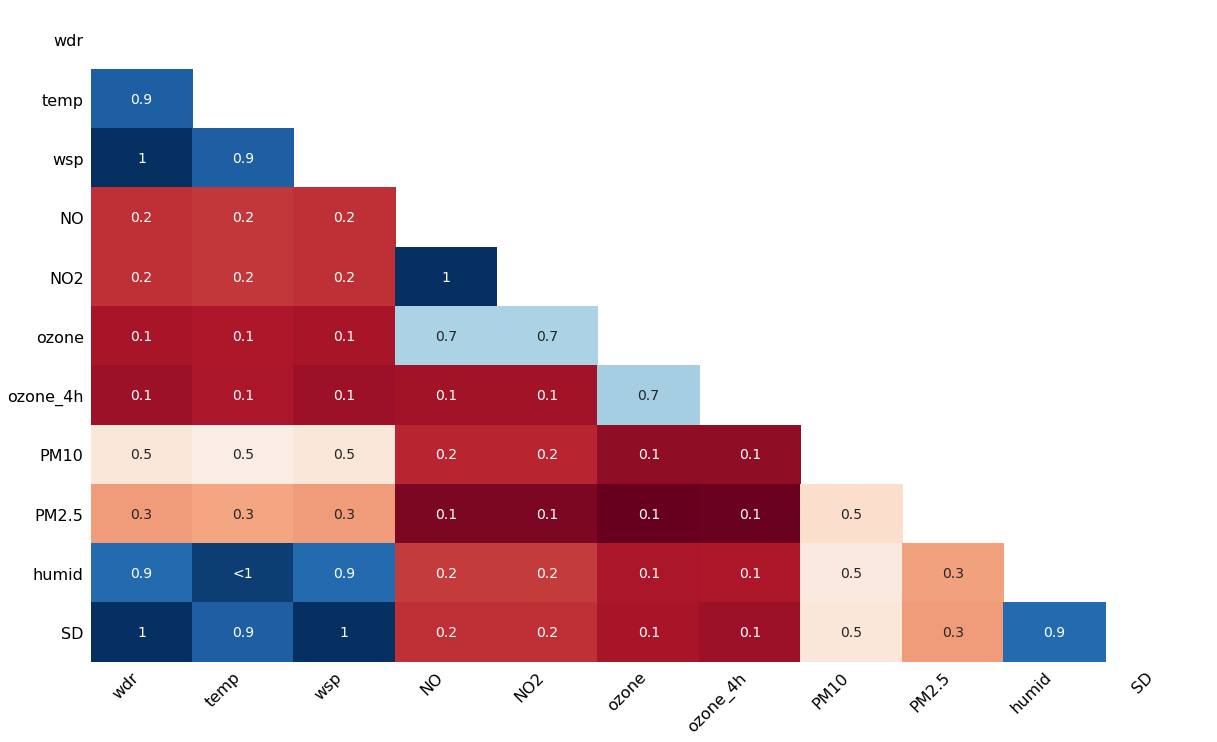

In [10]:
msno.heatmap(airqual)

From the matrix and bar plot, we see that there is no CO data so we can remove these two columns. Also, apart from a large chunk of missing ozone data, the set seems a priori to be quite complete as all predictors are there at least 90% of the time <br>

The heatmap and dendrogram tell us that the presence of windspeed and direction data, as well as the temperature and humidity data are quite correlated (when one is missing, the others often are), which makes sense as the same sensor must measure wind speed, direction and horizontal component. The same sensor group is probably measuring temperature and humidity. The NO and NO2 data have a perfect correlation for the same reason. We see that there is some correlation in the presence/absence of pollutant concentrations (When NO is not measured, ozone for example tends not to be either)

This all means that the dataset is quite complete and the positions of missing points are quite well correlated between the predictors. This means that if we decide to do the simplest approach and get rid of points with missing data, we should not get too high a loss in terms of the number of points. We can also try to recover some of the data by filling in missing values if there are not too many missing in a row

In [11]:
airqual=airqual.drop(['CO', 'CO_8h'], axis=1)

#Change the time format to integer
airqual.loc[:,'time']=[int(i[0:2]) for i in airqual.loc[:,'time']]

#change the date format to day number since start of year
airqual.loc[:,'date']=[1+i//24 for i in range(len(airqual.loc[:,'date']))]



In [12]:
def calcmissing(df):
    missing=sum([True for idx, row in df.iterrows() if any(row.isnull())])
    return missing
missing=calcmissing(airqual)
missingfrac=np.round(100.*missing/len(airqual),2)

def distribmissing(df, col, type_=float):
    missing=df.isnull().loc[:,col].astype(type_).groupby(df.loc[:,col].notnull().astype(type_).cumsum()).sum()
    missing[missing!=0]
    return missing

print('Discarding data with empty values would make us lose %f percent of our dataset (%i in total)' %(missingfrac, missing))

Discarding data with empty values would make us lose 12.680000 percent of our dataset (1114 in total)


This seems accepable but we can probably reduce that number by inferring series of 2-3 missing points by taking the average of the last point before the drop and the first point after. Let's see the distribution of missing data for NO and ozone. We plot the histogram of the number of consecutive missing values. 1st row is NO, 2nd row is Ozone. 1st column is the full histogram and second column had a reduced y axis limit to better see the instances that are not in the main peak.

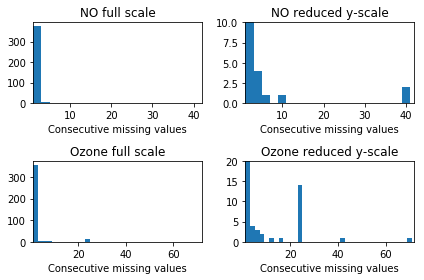

In [13]:
missingNO=distribmissing(airqual, 'NO')
missingOzone=distribmissing(airqual, 'ozone')

fig=plt.figure()

plt.subplot(221)
plt.hist(missingNO, bins=np.arange(1,np.max(missingNO)+2,2))
plt.xlim((1,np.max(missingNO)+1))
plt.xlabel('Consecutive missing values')
plt.title('NO full scale')

plt.subplot(222)
plt.hist(missingNO, bins=np.arange(1,np.max(missingNO)+2,2))
plt.xlim((1,np.max(missingNO)+1))
plt.ylim(0,10)
plt.xlabel('Consecutive missing values')
plt.title('NO reduced y-scale')

plt.subplot(223)
plt.hist(missingOzone, bins=np.arange(1,np.max(missingOzone)+2,2))
plt.xlim((1,np.max(missingOzone)+1))
plt.xlabel('Consecutive missing values')
plt.title('Ozone full scale')

plt.subplot(224)
plt.hist(missingOzone, bins=np.arange(1,np.max(missingOzone)+2,2))
plt.xlim((1,np.max(missingOzone)+1))
plt.ylim(0,20)
plt.xlabel('Consecutive missing values')
plt.title('Ozone reduced y-scale')

plt.tight_layout()

We can see that most of our missing data consists of 1-3 consecutive values which we can easily fill in by interpolating using the last measured points before the drop and the first points after. Let's interpolate the missing data when there are at most 3 consecutive missing values. We choose 3 as a limit because one of the parameters is the rolling average over 4h (so over 4 points measured every hour). We can take the leap of faith that the authors of the database chose a rolling average of over 4h because the fluctuations are not too big and we try to be a bit more conservative by taking only 3h.

We first check that the missing points are not due to unseasonable weather (storm, heat wave). To do this, we make missing points easily identifiable by giving them a negative value. Then, we plot the meteorological data as a function of time (in hours since the first measurement) as well as the pollutant concentration measurements. If the missing data is due to the instruments being turned off when the weather is too harsh, we would expect to see the missing points to be close to higher values of wind speed and humidity (for storms) or temperature (if heat/cold wave).

Text(0,0.5,'Ozone')

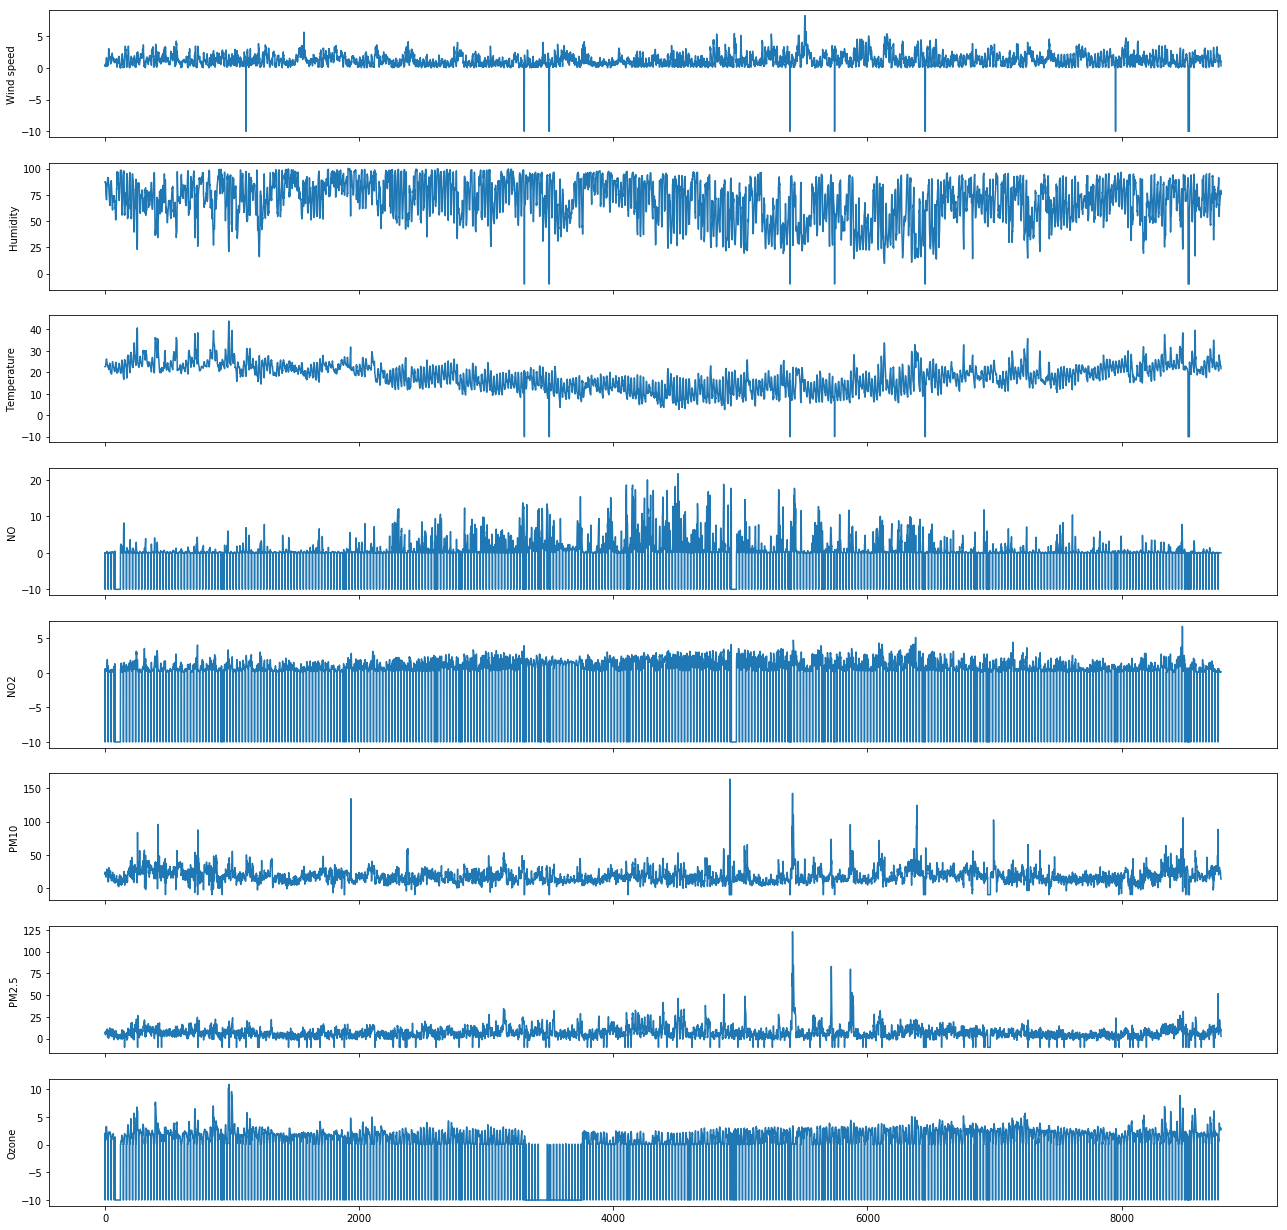

In [14]:
airqual2=airqual.copy()
airqual2=airqual2.fillna(value=-10)
fig, (ax1,ax2,ax3,ax4, ax5, ax6, ax7, ax8)=plt.subplots(8,1, sharex=True, figsize=(22,22))
ax1.plot(airqual2.loc[:,'wsp'])
ax1.set_ylabel('Wind speed')
ax2.plot(airqual2.loc[:,'humid'])
ax2.set_ylabel('Humidity')
ax3.plot(airqual2.loc[:,'temp'])
ax3.set_ylabel('Temperature')
ax4.plot(airqual2.loc[:,'NO'])
ax4.set_ylabel('NO')
ax5.plot(airqual2.loc[:,'NO2'])
ax5.set_ylabel('NO2')
ax6.plot(airqual2.loc[:,'PM10'])
ax6.set_ylabel('PM10')
ax7.plot(airqual2.loc[:,'PM2.5'])
ax7.set_ylabel('PM2.5')
ax8.plot(airqual2.loc[:,'ozone'])
ax8.set_ylabel('Ozone')



It looks like the missing data is not due to unreasonable weather. It looks like most of it really is just due to data randomly not being recorded. There is a couple of points that are missing for all predictors, which we infer to be due to shutdown of the whole sensor array.

We can then proceed with replacing the sets of consecutive missing values with an interpolation of the data acquired before and after the shutdown. As mentioned earlier, we do it for up to 3 consecutive missing points

In [15]:
airqual=airqual.interpolate(method='polynomial', order=2, limit=3)

Let's see how what our data looks like now

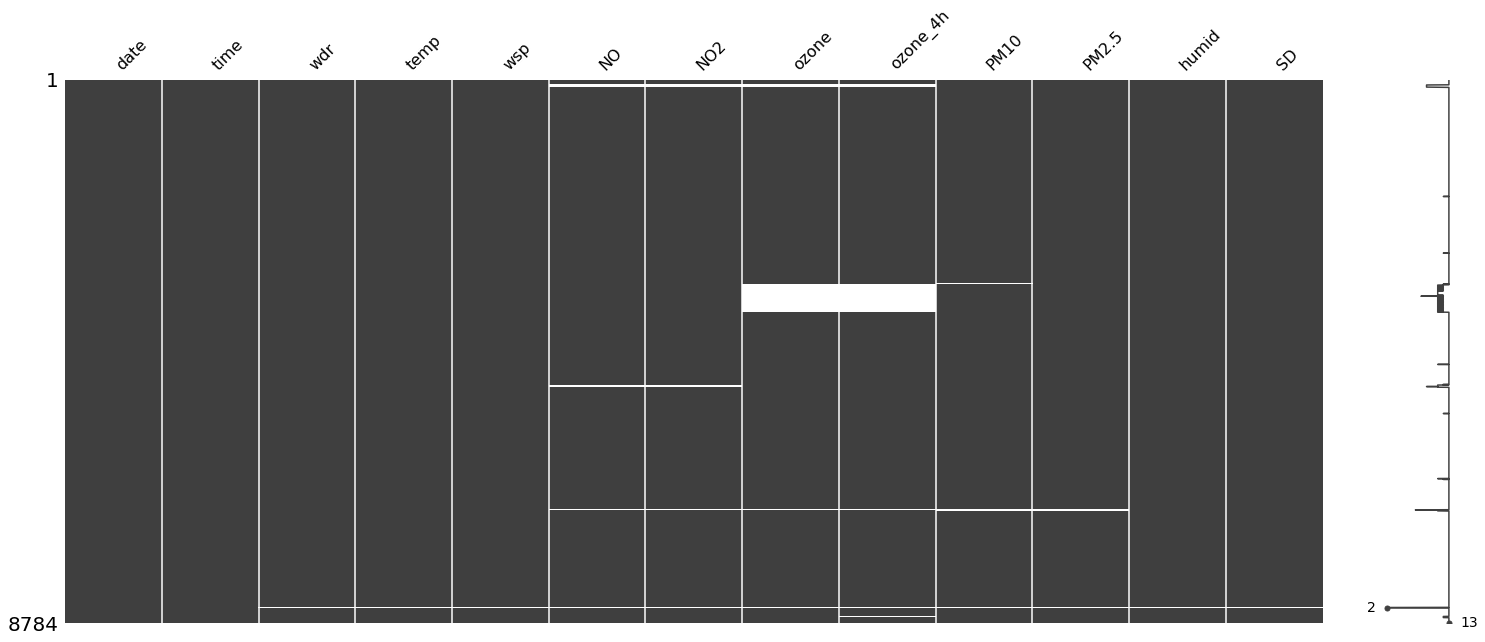

In [16]:
msno.matrix(airqual)

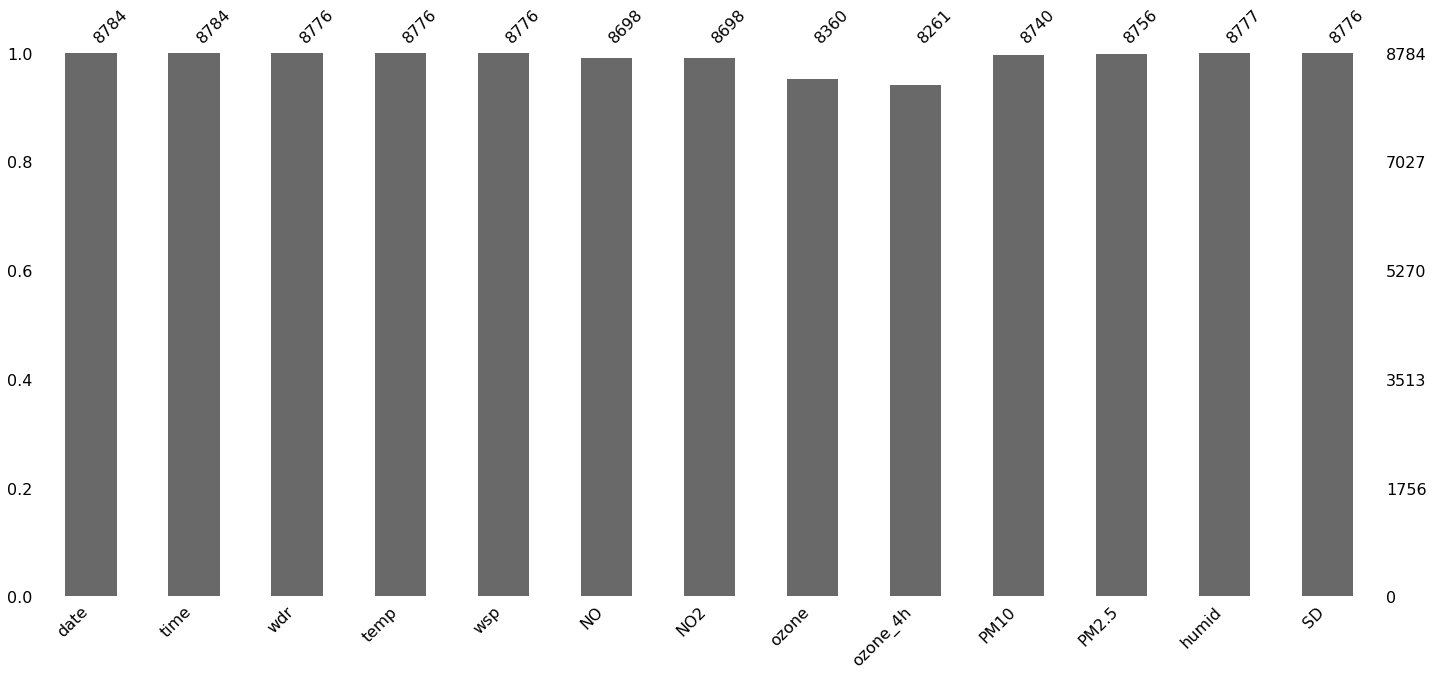

In [17]:
msno.bar(airqual)

In [18]:
missing_ai=calcmissing(airqual)
missingfrac_ai=np.round(100.*missing_ai/len(airqual),2)
print('Discarding data with empty values after the interpolation would make us lose %f percent of our dataset (%i in total)' %(missingfrac_ai, missing_ai))

Discarding data with empty values after the interpolation would make us lose 6.730000 percent of our dataset (591 in total)


In [19]:
missingNO_ai=distribmissing(airqual, 'NO')
missingOzone_ai=distribmissing(airqual, 'ozone')

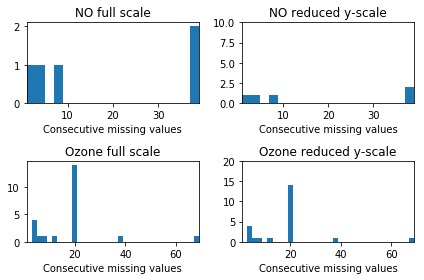

In [20]:
fig=plt.figure()

plt.subplot(221)
plt.hist(missingNO_ai, bins=np.arange(1,np.max(missingNO_ai)+2,2))
plt.xlim((1,np.max(missingNO_ai)+1))
plt.xlabel('Consecutive missing values')
plt.title('NO full scale')

plt.subplot(222)
plt.hist(missingNO_ai, bins=np.arange(1,np.max(missingNO_ai)+2,2))
plt.xlim((1,np.max(missingNO_ai)+1))
plt.ylim(0,10)
plt.xlabel('Consecutive missing values')
plt.title('NO reduced y-scale')

plt.subplot(223)
plt.hist(missingOzone_ai, bins=np.arange(1,np.max(missingOzone_ai)+2,2))
plt.xlabel('Consecutive missing values')
plt.xlim((1,np.max(missingOzone_ai)+1))
plt.title('Ozone full scale')

plt.subplot(224)
plt.hist(missingOzone_ai, bins=np.arange(1,np.max(missingOzone_ai)+2,2))
plt.xlim((1,np.max(missingOzone_ai)+1))
plt.ylim(0,20)
plt.xlabel('Consecutive missing values')
plt.title('Ozone reduced y-scale')

plt.tight_layout()

This is good. We have "recovered" 6% of our data. We can probably get rid of the missing data now. A part of the data that is still missing corresponds to a series of measurements where neither pollution nor meteorological data was taken. Another one corresponds to a series of points where no pollution data was taken. These points are therefore useless anyway and we can safely assume that they hold no hidden meaning that could give us information. It could be due to power cuts, instrument maintenance etc.
The major chunk of missing data corresponds to the series of 70h where no ozone data was taken. We assume that it is best to remove that chunk as a first approximation. Another possibility would be to fit the ozone data on the whole time series and try to interpolate the missing points or to use the other predictors to infer the ozone concentrations.

In [21]:
airqual=airqual.dropna(how='any')

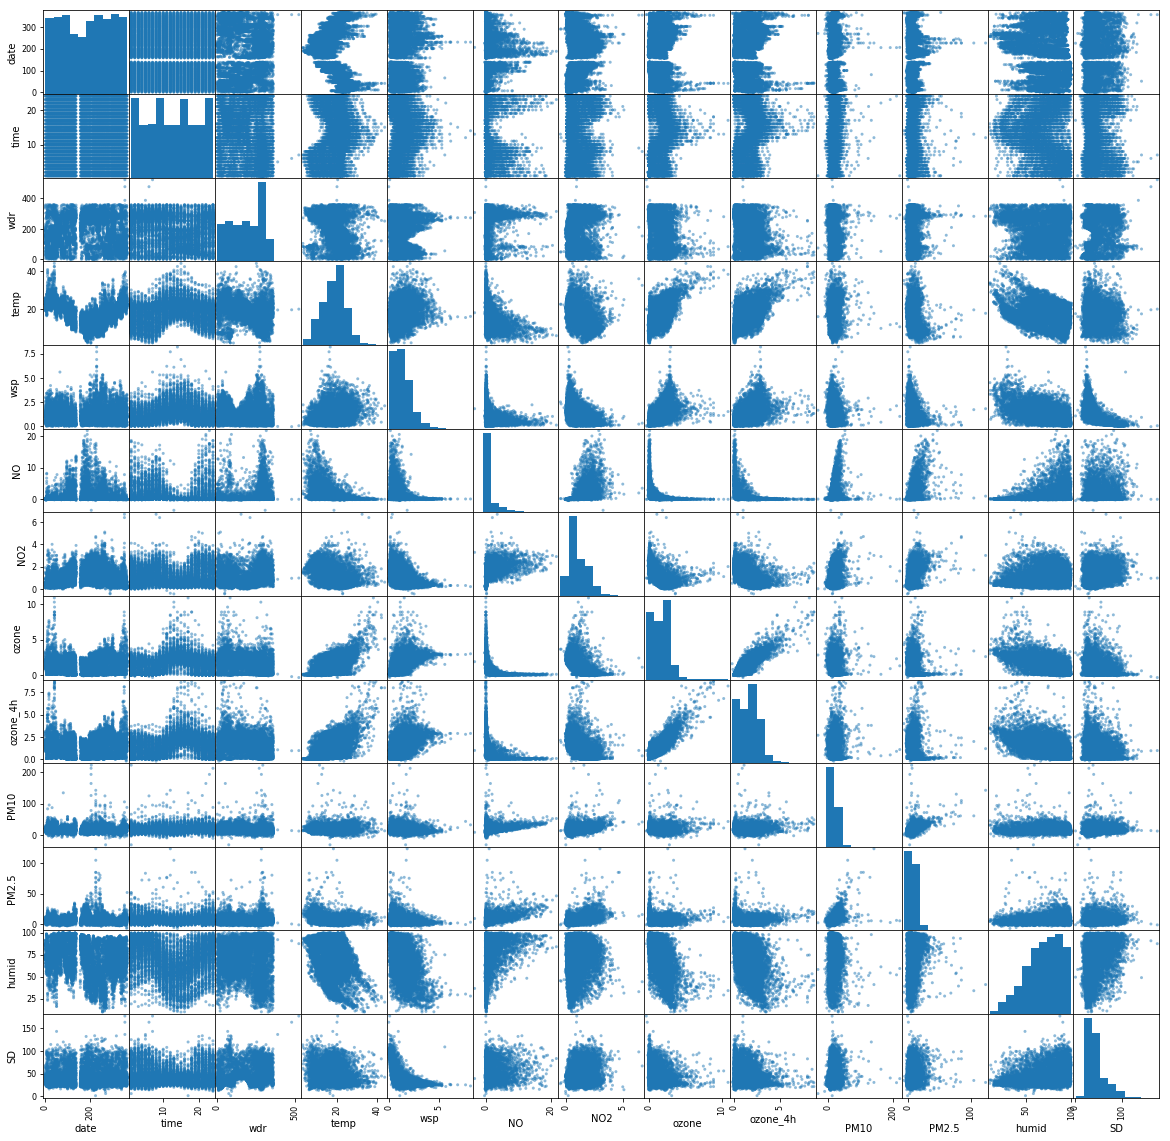

In [22]:
from pandas.plotting import scatter_matrix
scatter_matrix(airqual, figsize=(20,20))
plt.show()

Visible corrs: PM2.5, PM10, ozone and NO tend to be higher when the wind is coming from the north (assuming wsp=0 means north)

NO is correlated with lower temperatures, higher humidity and inversely correlated with ozone. When the windspeed is low, NO accumulated in the air so part of the NO is generated locally. The correlation with winds from the north seems to suggest that a source of the gas is located somewhere north. No seems to be interestingly inversely correlated with the presence of ozone (or whatever other predictor that correlates with ozone). NO is also more present with higher humidity

NO2 also seems inversely correlated with wsp which means that it tends to accumulate in the air and some of it is probably produced locally. It also seems to have a somewhat inverse correlation with the presence of ozone.

Ozone seems to be more present in the atmosphere with higher temperatures.

PM2.5 and PM10 are also higher when the wind is coming from the north-east







In [23]:
NOmodel = airqual[['date', 'time', 'wdr', 'temp', 'wsp', 'humid', 'SD', 'NO']].copy()
NO2model = airqual[['date', 'time','wdr', 'temp', 'wsp', 'humid', 'SD', 'NO2']].copy()
Ozonemodel = airqual[['date', 'time','wdr', 'temp', 'wsp', 'humid', 'SD', 'ozone']].copy()
PM10model = airqual[['date', 'time','wdr', 'temp', 'wsp', 'humid', 'SD', 'PM10']].copy()
PM25model = airqual[['date', 'time','wdr', 'temp', 'wsp', 'humid', 'SD', 'PM2.5']].copy()

In [24]:
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.ensemble import RandomForestRegressor as RFR
from sklearn.ensemble import GradientBoostingRegressor as GBR
from sklearn.tree import DecisionTreeRegressor as DTR
from scipy.stats import skew, boxcox

We played a bit with transformations (squared and cubed roots etc) to make the data less skewed and chose the transforms for each that reduce the skewness the most. In principle applying a logarithmic transform to the data should be better at reducing the skewness but because we have many data points at 0, we can't really do that

In [25]:
NOX=NOmodel.iloc[:,0:-1]
NOy=NOmodel.iloc[:,-1]
#NOy=[i**(1./3) for i in NOy]
NOy[NOy<0]=0
NOy=[i**(1/3) for i in NOy]


NO2X=NO2model.iloc[:,0:-1]
NO2y=NO2model.iloc[:,-1]
NO2y[NO2y<0]=0
NO2y=[i**(1/3) for i in NO2y]

OzoneX=Ozonemodel.iloc[:,0:-1]
Ozoney=Ozonemodel.iloc[:,-1]
Ozoney[Ozoney<0]=0
Ozoney=[i**(1/2) for i in Ozoney]

PM10X=PM10model.iloc[:,0:-1]
PM10y=PM10model.iloc[:,-1]
PM10y[PM10y<0]=0
PM10y=[i**(1/3)for i in PM10y]

PM25X=PM25model.iloc[:,0:-1]
PM25y=PM25model.iloc[:,-1]
PM25y[PM25y<0]=0
PM25y=[i**(1/2) for i in PM25y]



C:\Users\BigusDickus\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  after removing the cwd from sys.path.
C:\Users\BigusDickus\Anaconda3\lib\site-packages\ipykernel_launcher.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  # Remove the CWD from sys.path while we load stuff.
C:\Users\BigusDickus\Anaconda3\lib\site-packages\ipykernel_launcher.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  from ipykernel import kernelapp as app

In [26]:
print(skew(NOmodel.iloc[:,-1]), skew(NO2model.iloc[:,-1]), skew(Ozonemodel.iloc[:,-1]), skew(PM10model.iloc[:,-1]), skew(PM25model.iloc[:,-1]))

print(skew(NOy), skew(NO2y), skew(Ozoney), skew(PM10y), skew(PM25y))


3.259103616684681 1.0003250892887872 0.8739193478742677 4.008488020267206 4.174958647744319
0.9279759794049594 0.04210519423504475 -0.365224822945245 -0.4239118965971008 0.5909042026783061


We implement a function that optimises a gradient boosted tree regressor using several GridSearchCV in series. We first optimise the parameters that in principle have the highest impact on the predictions and then move on to the ones that have a lower impact.

In [29]:
def GBoptimiser(X_train, y_train, learningrate_ini, verbose=0):
    learningrate=learningrate_ini
    subsampling=0.8
    print('Tuning n_estimators and max_depth')
    param_grid={'n_estimators': np.arange(40, 151, 10),
               'max_depth': np.arange(3, 12, 1)}
    gs1=GridSearchCV(GBR(learning_rate=learningrate_ini, subsample=subsampling, max_features='sqrt'), param_grid=param_grid, cv=5, verbose=verbose)
    gs1.fit(X_train, y_train)
    nestimators=gs1.best_params_['n_estimators']
    maxdepth=gs1.best_params_['max_depth']
    print('n_estimators: %i, max_depth: %i' %(nestimators, maxdepth))
    print('Best crossvalidation score: %f' % gs1.best_score_ )

    print('Tuning min_:samples_leaf')
    param_grid={'min_samples_leaf': np.arange(5,40,5,)}
    gs3=GridSearchCV(GBR(learning_rate=learningrate_ini, n_estimators=nestimators, max_depth=maxdepth, subsample=subsampling, max_features='sqrt'), param_grid=param_grid, cv=5, verbose=verbose)
    gs3.fit(X_train, y_train)
    minsampleaf=gs3.best_params_['min_samples_leaf']   
    print('min_samples_leaf: %i' % minsampleaf)
    print('Best crossvalidation score: %f' % gs3.best_score_ )
    
    print('Tuning max_features')
    param_grid={'max_features': np.arange(1, 8, 1)}
    gs4=GridSearchCV(GBR(learning_rate=learningrate_ini, n_estimators=nestimators, subsample=subsampling, max_depth=maxdepth, min_samples_leaf=minsampleaf), param_grid=param_grid, cv=5, verbose=verbose)
    gs4.fit(X_train, y_train)    
    maxfeatures=gs4.best_params_['max_features'] 
    print('max_features: %i' %maxfeatures)
    print('Best crossvalidation score: %f' % gs4.best_score_ )
    
    print('Tuning subsampling')
    param_grid={'subsample': np.arange(0.1, 1.1, 0.1)}
    gs5=GridSearchCV(GBR(learning_rate=learningrate_ini, n_estimators=nestimators, max_depth=maxdepth, min_samples_leaf=minsampleaf), param_grid=param_grid, cv=5, verbose=verbose)
    gs5.fit(X_train, y_train)    
    subsampling=gs5.best_params_['subsample'] 
    print('subsampling: %f' % subsampling)
    print('Best crossvalidation score: %f' % gs5.best_score_ )
    
    factors=[2,10,50]
    clfs=[]
    scores=[]
    rates=[]
    estimators=[]
    print('Tuning learning_rate')
    for i in range(len(factors)):
        rate=learningrate_ini/factors[i]
        rates.append(rate)
        n_estimators=nestimators*factors[i]
        estimators.append(n_estimators)
        print('learning_rate %f: ' % rate)
        clf=GBR(n_estimators=n_estimators, max_depth=maxdepth, min_samples_leaf=minsampleaf, max_features=maxfeatures, subsample=subsampling, learning_rate=rate)
        clf.fit(X_train, y_train)
        scores.append(clf.score(X_train, y_train))
        clfs.append(clf)
    
    bestmodel=clfs[np.argmax(scores)]
    bestparams=[rates[np.argmax(scores)], estimators[np.argmax(scores)], maxdepth, minsampleaf, maxfeatures, subsampling]
    print('Best score: %f' %np.max(scores))
    return bestmodel, bestparams


In [30]:
import time

In [31]:
def opti(X,y):
    start_time = time.time()
    X_train, X_test, y_train, y_test=train_test_split(X,y, train_size=0.7, random_state=42)
    model, params=GBoptimiser(X_train, y_train, 0.02)
    learningrate=params[0]
    maxdepth=params[2]
    estimators=params[1]
    minsampleaf=params[3]
    maxfeatures=params[4]
    subsample=params[5]
    model=GBR(n_estimators=estimators, max_depth=maxdepth, learning_rate=learningrate, min_samples_leaf=minsampleaf, max_features=maxfeatures, subsample=subsample)
    model.fit(X_train, y_train)
    testscore=model.score(X_test, y_test)
    print("Execution (real) time: %s s ---" % (time.time() - start_time))
    return model, testscore, X_test, y_test

In [32]:

NO_model, NO_testscore, NO_Xtest, NO_ytest=opti(NOX, NOy)
NO2_model, NO2_testscore, NO2_Xtest, NO2_ytest=opti(NO2X, NO2y)
Ozone_model, Ozone_testscore, Ozone_Xtest, Ozone_ytest=opti(OzoneX, Ozoney)
PM25_model, PM25_testscore, PM25_Xtest, PM25_ytest=opti(PM25X, PM25y)
PM10_model, PM10_testscore, PM10_Xtest, PM10_ytest=opti(PM10X, PM10y)

C:\Users\BigusDickus\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:2026: FutureWarning: From version 0.21, test_size will always complement train_size unless both are specified.
  FutureWarning)


Tuning n_estimators and max_depth
n_estimators: 150, max_depth: 11
Best crossvalidation score: 0.740213
Tuning min_:samples_leaf
min_samples_leaf: 5
Best crossvalidation score: 0.742043
Tuning max_features
max_features: 4
Best crossvalidation score: 0.750266
Tuning subsampling
subsampling: 0.600000
Best crossvalidation score: 0.748591
Tuning learning_rate
learning_rate 0.010000: 
learning_rate 0.002000: 
learning_rate 0.000400: 
Best score: 0.920781
Execution (real) time: 457.28264021873474 s ---
Tuning n_estimators and max_depth


C:\Users\BigusDickus\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:2026: FutureWarning: From version 0.21, test_size will always complement train_size unless both are specified.
  FutureWarning)


n_estimators: 150, max_depth: 11
Best crossvalidation score: 0.777160
Tuning min_:samples_leaf
min_samples_leaf: 5
Best crossvalidation score: 0.777304
Tuning max_features
max_features: 4
Best crossvalidation score: 0.780380
Tuning subsampling
subsampling: 0.500000
Best crossvalidation score: 0.779616
Tuning learning_rate
learning_rate 0.010000: 
learning_rate 0.002000: 
learning_rate 0.000400: 
Best score: 0.915195
Execution (real) time: 410.16057443618774 s ---
Tuning n_estimators and max_depth


C:\Users\BigusDickus\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:2026: FutureWarning: From version 0.21, test_size will always complement train_size unless both are specified.
  FutureWarning)


n_estimators: 150, max_depth: 11
Best crossvalidation score: 0.856019
Tuning min_:samples_leaf
min_samples_leaf: 5
Best crossvalidation score: 0.853163
Tuning max_features
max_features: 3
Best crossvalidation score: 0.856175
Tuning subsampling
subsampling: 0.500000
Best crossvalidation score: 0.855205
Tuning learning_rate
learning_rate 0.010000: 
learning_rate 0.002000: 
learning_rate 0.000400: 
Best score: 0.947423
Execution (real) time: 448.39719796180725 s ---
Tuning n_estimators and max_depth


C:\Users\BigusDickus\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:2026: FutureWarning: From version 0.21, test_size will always complement train_size unless both are specified.
  FutureWarning)


n_estimators: 140, max_depth: 11
Best crossvalidation score: 0.425639
Tuning min_:samples_leaf
min_samples_leaf: 5
Best crossvalidation score: 0.412369
Tuning max_features
max_features: 7
Best crossvalidation score: 0.447678
Tuning subsampling
subsampling: 0.800000
Best crossvalidation score: 0.448253
Tuning learning_rate
learning_rate 0.010000: 
learning_rate 0.002000: 
learning_rate 0.000400: 
Best score: 0.823955
Execution (real) time: 535.4647498130798 s ---
Tuning n_estimators and max_depth


C:\Users\BigusDickus\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:2026: FutureWarning: From version 0.21, test_size will always complement train_size unless both are specified.
  FutureWarning)


n_estimators: 150, max_depth: 11
Best crossvalidation score: 0.416979
Tuning min_:samples_leaf
min_samples_leaf: 5
Best crossvalidation score: 0.413341
Tuning max_features
max_features: 7
Best crossvalidation score: 0.450254
Tuning subsampling
subsampling: 0.800000
Best crossvalidation score: 0.450915
Tuning learning_rate
learning_rate 0.010000: 
learning_rate 0.002000: 
learning_rate 0.000400: 
Best score: 0.840597
Execution (real) time: 563.4527888298035 s ---


In [33]:
print(NO_testscore, NO2_testscore, Ozone_testscore, PM25_testscore, PM10_testscore)

0.7592493480164871 0.7949961980648916 0.8695679095160073 0.4860857712541237 0.4835547220528959


In [34]:
from sklearn.metrics import mean_squared_error as MSE

To quickly check where our predictions are off, we get the histograms of the predicted (blue) and the actual (red) data for ozone. We see that we seem to be more often off for low concentration values. This is fine because in principle we would like to be good at detecting high values

(array([23., 16., 26.,  9.,  7.,  7.,  5.,  5.,  0.,  2.]),
 array([0.04404618, 0.2692556 , 0.49446501, 0.71967442, 0.94488383,
        1.17009325, 1.39530266, 1.62051207, 1.84572148, 2.0709309 ,
        2.29614031]),
 <a list of 10 Patch objects>)

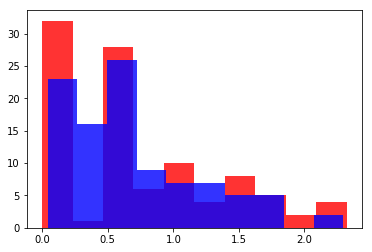

In [38]:
plt.hist(ytest, color='red', alpha=0.8)
plt.hist(ypred, color='blue', alpha=0.8)

In [39]:


def plotfeatimportances(df, model, title):
    importances=model.feature_importances_
    labels=df.columns.values.tolist()
    plt.bar(labels, importances)
    plt.ylabel('feature importance')
    plt.title(title)
    plt.show()

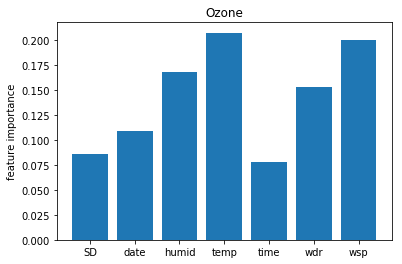

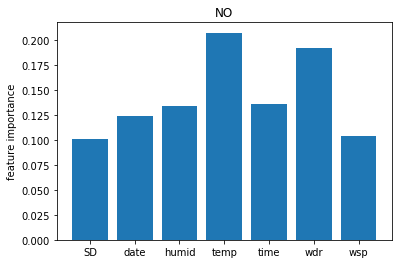

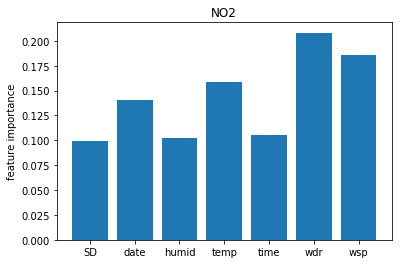

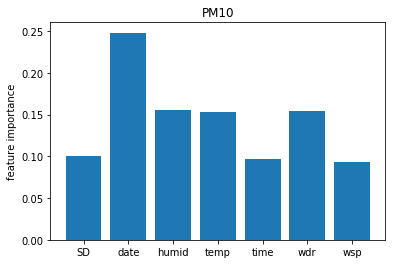

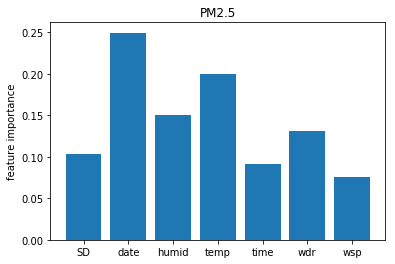

In [40]:
plotfeatimportances(OzoneX, Ozone_model, 'Ozone')
plotfeatimportances(NOX, NO_model, 'NO')
plotfeatimportances(NO2X, NO2_model, 'NO2')
plotfeatimportances(PM10X, PM10_model, 'PM10')
plotfeatimportances(PM25X, PM25_model, 'PM2.5')

PM2.5, PM10 and NO could be due to traffic. In that sense they would be correlated with time but we can check by using other databases. New South Whales has a traffic volume database from which we could extract the number of cars passing as a function of time in three counting spots around Earlwood: Princes Highway, Canterbury Road and Bexley Road (There are no stations within Earlwood). We can then use traffic volume as a predictor and see if we can get a better prediction.

In [41]:
Cars_princes=pd.read_csv("23001 - Princes Highway.csv")
Cars_canterbury=pd.read_csv("24213 - Canterbury Road.csv")
Cars_bexley=pd.read_csv("24221 - Bexley Road.csv")

The Canterbury Road data has too many missing values so we dismiss that dataset. For Princes, and Bexley, we need to make the format of the data similar to that of the air quality dataset. First, as an approximation, we can get rid of the columns corresponding to the type of vehicles and whether the day in question is a public or a school holiday since we want to at first just look at the effect of the number of cars on the road. Both datasets have a 'direction' column corresponding to the direction of traffic. All the data in the Princes Highway set correspond to cars going in one direction so we can drop that predictor. For Bexley, there is data for both Northbound and southbound traffic but a lot of the southbound data is missing. Because we want to have a new predictor that is an estimation of the number of cars on the road, we would like to simply take the sum of traffic on Princes and Bexley. Keeping the heavily missing southbound traffic data would make us give up on a lot of points so we choose to drop it. The NSW traffic volume website shows histograms of the traffic and the northbound and southbound traffic is roughly similar anyway.

In [42]:
#Cars_princes.drop(['cardinal_direction_seq','classification_seq','public_holiday', 'school_holiday'], axis=1)
Cars_bexley=Cars_bexley[Cars_bexley['cardinal_direction_seq']=='Northbound']
#Cars_bexley=Cars_bexley.drop(['cardinal_direction_seq','classification_seq','public_holiday', 'school_holiday'], axis=1)


We need to format the traffic data to make it similar to the air quality data. To do this, we wrote a couple of functions (there are probably much cleaner ways to do that)

In [43]:
def date_to_day(date, format='%Y-%m-%d'):
    date = pd.to_datetime(date, format=format)
    new_year_day = pd.Timestamp(year=date.year, month=1, day=1)
    return (date - new_year_day).days + 1

def get_missing_vals(df):
    ind=[]
    for i in range(1,366):
        ind.append(i)
    days=[]
    for i in range(df.shape[0]):
        day=date_to_day(df.iloc[i][1])
        days.append(day)
    missing_vals = np.setdiff1d(ind,days, assume_unique=True)
    return missing_vals

def reformat(df):
    missing_vals = get_missing_vals(df)
    carnum=[]
    dates=[]
    hours=[]
    k=0
    last_notmissing=0
    for i in range(1,366):#df.shape[0]+1):

        if i in missing_vals:
            for j in range(4,28):
                dates.append(i)
                carnum.append(np.nan)
                #dates.append(np.nan)
                hours.append(1+(k%24))   
                k+=1
        else:
            for j in range(4,28):
                #day=date_to_day(df.iloc[last_notmissing][1])
                dates.append(i)
                cars=df.iloc[last_notmissing,j]
                carnum.append(cars)
                #dates.append(day)
                hours.append(1+(k%24))   
                k+=1   
            last_notmissing+=1

    newdf = pd.DataFrame(
    {'CarsDate': dates,
    'CarsTime': hours,
    'Carnum': carnum})
    return newdf
          


In [44]:
Cars_princes2=reformat(Cars_princes)
Cars_bexley2=reformat(Cars_bexley)

We take the sum of the traffic volume as a predictor of the traffic within Earlwood

In [45]:
from operator import add
dates=Cars_princes2.iloc[:,1]
times=Cars_princes2.iloc[:,2]
carnum=[Cars_princes2.iloc[i,0]+Cars_bexley2.iloc[i,0] for i in range(Cars_bexley2.shape[0])]

In [46]:
from operator import add
Cars_princes2
cars=pd.DataFrame({'Carsdate':dates, 'Carstime': times, 'Carnum': carnum})

We now combine it with the air quality data. We date the untouched air quality data, add the traffic volume and then do the same preprocessing as we had done for our first tests without air quality data

In [47]:
airqual=pd.read_excel("Earlwood_Air_Data_17_18.xls")
names_ini=airqual.columns
names_new=['date', 'time', 'wdr', 'temp', 'wsp', 'NO', 'NO2', 'CO', 'ozone', 'ozone_4h', 'PM10', 'PM2.5', 'humid', 'SD', 'CO_8h']
for i in range(len(names_ini)):
    airqual.rename(columns={names_ini[i]:names_new[i]}, inplace=True)
airqual=airqual.drop(airqual.index[-24:])
#Change the time format to integer
airqual.loc[:,'time']=[int(i[0:2]) for i in airqual.loc[:,'time']]

#change the date format to day number since start of year
airqual.loc[:,'date']=[1+i//24 for i in range(len(airqual.loc[:,'date']))]
airqual=airqual.drop(['CO', 'CO_8h'], axis=1)

In [48]:
airqual.loc[:,13]=cars.iloc[:,0]

In [49]:
airqual.rename(columns={13:'Carnum'}, inplace=True)

(8760, 14)

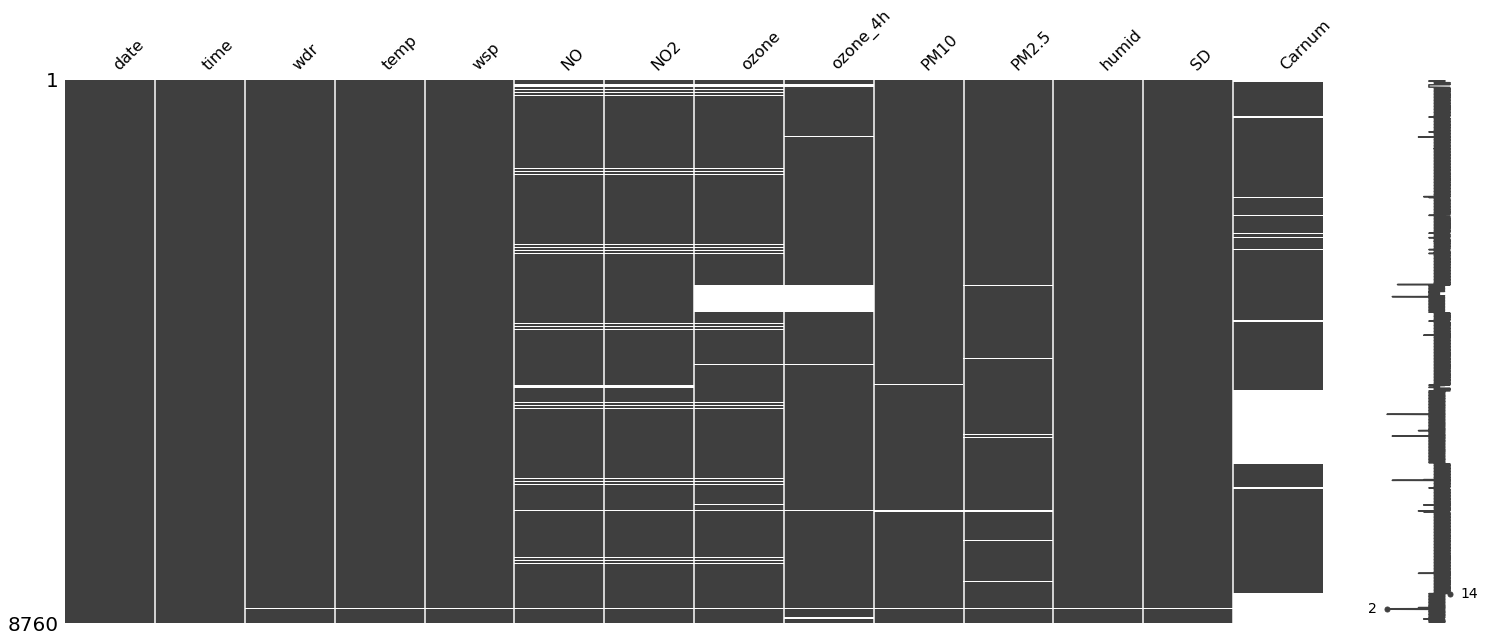

In [50]:
msno.matrix(airqual)
airqual.shape

In [51]:
airqual=airqual.interpolate(method='polynomial', order=2, limit=3)

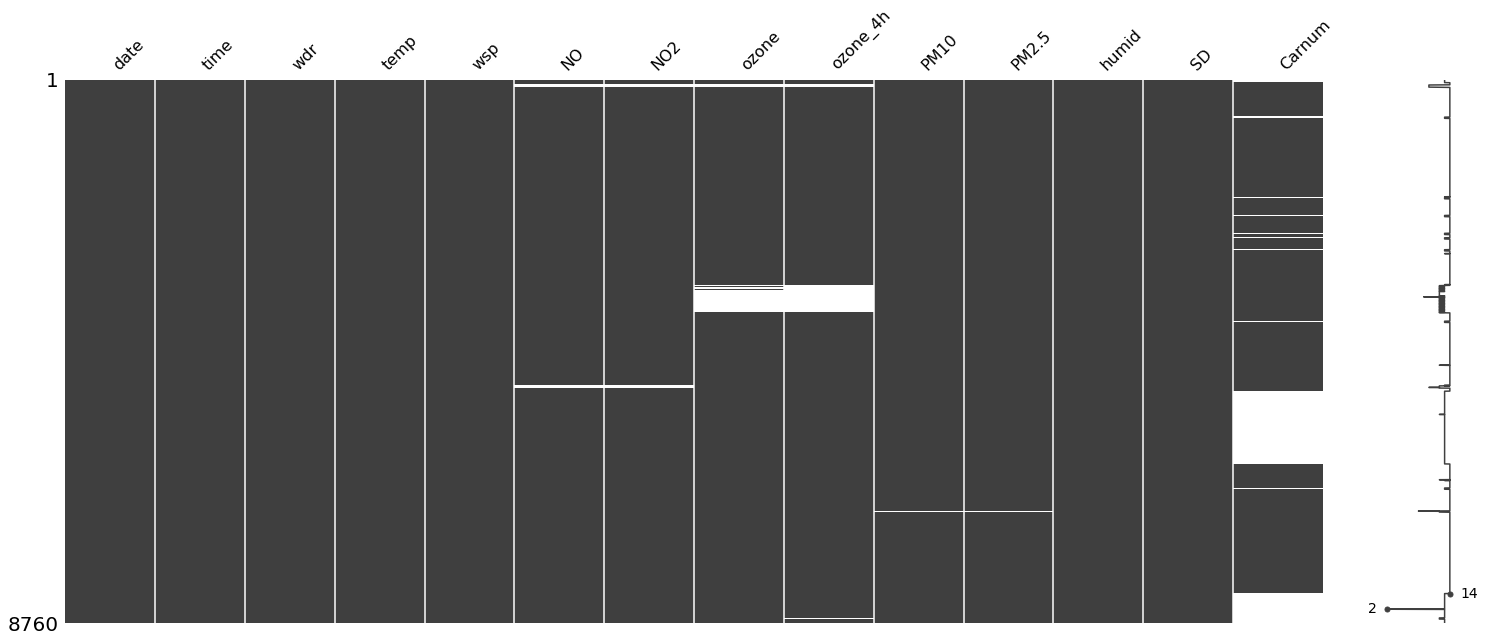

In [52]:
msno.matrix(airqual)

In [53]:
airqual.dropna(how='any')

,date,time,wdr,temp,wsp,NO,NO2,ozone,ozone_4h,PM10,PM2.5,humid,SD,Carnum
48,3,1,221.9,19.9,1.3,0.000000,0.400000,1.100000,1.3,15.0,5.5,84.2,23.51,382.0
49,3,2,209.2,19.3,1.0,-0.000915,0.442759,0.889027,1.2,15.8,5.3,88.5,46.38,217.0
50,3,3,219.0,19.2,1.3,0.000000,0.400000,0.800000,1.0,11.0,2.7,87.4,26.72,198.0
51,3,4,214.9,19.2,1.3,0.000000,0.300000,1.000000,1.0,11.6,4.9,84.1,26.24,296.0
52,3,5,209.3,19.3,1.4,0.000000,0.400000,0.900000,0.9,11.7,6.2,80.1,30.57,537.0
53,3,6,206.7,19.3,1.9,0.100000,0.400000,0.900000,0.9,14.0,3.3,78.1,28.73,1413.0
54,3,7,199.2,20.1,1.9,0.300000,0.500000,1.000000,0.9,15.5,2.8,74.3,34.10,2489.0
55,3,8,194.3,21.1,2.0,0.200000,0.300000,1.200000,1.0,17.3,5.1,69.8,36.63,2892.0
56,3,9,192.6,22.4,2.1,0.100000,0.200000,1.500000,1.1,16.1,5.3,65.2,38.93,2940.0
57,3,10,185.6,23.6,2.3,0.100000,0.200000,1.700000,1.3,18.8,5.7,62.2,38.96,2805.0


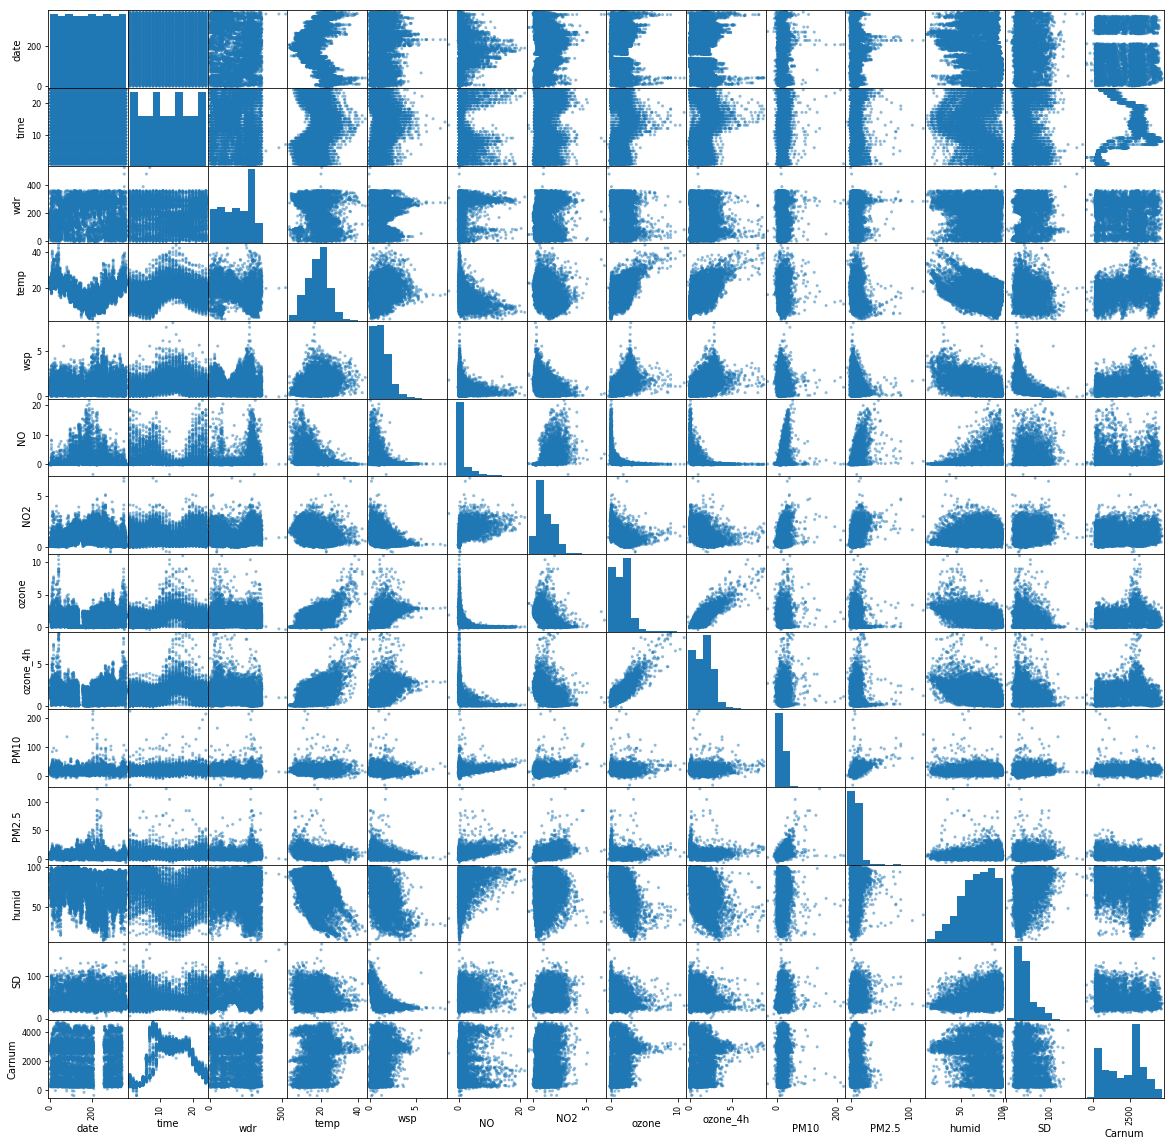

In [54]:
from pandas.plotting import scatter_matrix
scatter_matrix(airqual, figsize=(20,20))
plt.show()

In [83]:
NOmodel = airqual[['date', 'time', 'wdr', 'temp', 'wsp', 'humid', 'SD', 'Carnum', 'NO',]].copy()
NO2model = airqual[['date', 'time', 'wdr', 'temp', 'wsp', 'humid', 'SD', 'Carnum', 'NO2']].copy()
Ozonemodel = airqual[['date', 'time', 'wdr', 'temp', 'wsp', 'humid', 'SD', 'Carnum', 'ozone']].copy()
PM10model = airqual[['date', 'time', 'wdr', 'temp', 'wsp', 'humid', 'SD', 'Carnum', 'PM10']].copy()
PM25model = airqual[['date', 'time', 'wdr', 'temp', 'wsp', 'humid', 'SD', 'Carnum', 'PM2.5']].copy()

NOmodel=NOmodel.dropna(how='any')
NO2model=NO2model.dropna(how='any')
Ozonemodel=Ozonemodel.dropna(how='any')
PM10model=PM10model.dropna(how='any')
PM25model=PM25model.dropna(how='any')

NOX=NOmodel.iloc[:,0:-1]
NOy=NOmodel.iloc[:,-1]
#NOy=[i**(1./3) for i in NOy]
NOy[NOy<0]=0
NOy=[i**(1/3) for i in NOy]


NO2X=NO2model.iloc[:,0:-1]
NO2y=NO2model.iloc[:,-1]
NO2y[NO2y<0]=0
NO2y=[i**(1/3) for i in NO2y]

OzoneX=Ozonemodel.iloc[:,0:-1]
Ozoney=Ozonemodel.iloc[:,-1]
Ozoney[Ozoney<0]=0
Ozoney=[i**(1/2) for i in Ozoney]

PM10X=PM10model.iloc[:,0:-1]
PM10y=PM10model.iloc[:,-1]
PM10y[PM10y<0]=0
PM10y=[i**(1/3)for i in PM10y]

PM25X=PM25model.iloc[:,0:-1]
PM25y=PM25model.iloc[:,-1]
PM25y[PM25y<0]=0
PM25y=[i**(1/2) for i in PM25y]


NO_rgr, NO_testscore, NO_Xtest, NO_ytest=opti(NOX, NOy)
NO2_rgr, NO2_testscore, NO2_Xtest, NO2_ytest=opti(NO2X, NO2y)
Ozone_rgr, Ozone_testscore, Ozone_Xtest, Ozone_ytest=opti(OzoneX, Ozoney)
PM25_rgr, PM25_testscore, PM25_Xtest, PM25_ytest=opti(PM25X, PM25y)
PM10_rgr, PM10_testscore, PM10_Xtest, PM10_ytest=opti(PM10X, PM10y)
print(NO_testscore, NO2_testscore, Ozone_testscore, PM25_testscore, PM10_testscore)

C:\Users\BigusDickus\Anaconda3\lib\site-packages\ipykernel_launcher.py:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
C:\Users\BigusDickus\Anaconda3\lib\site-packages\ipykernel_launcher.py:28: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
C:\Users\BigusDickus\Anaconda3\lib\site-packages\ipykernel_launcher.py:33: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
C:\Users\BigusDickus\Anaconda3\lib\site-packages\ipykernel_launcher.py:38: SettingWithCopyWarning: 
A value is trying to be set on a 

Tuning n_estimators and max_depth
n_estimators: 150, max_depth: 11
Best crossvalidation score: 0.774204
Tuning min_:samples_leaf
min_samples_leaf: 5
Best crossvalidation score: 0.777326
Tuning max_features
max_features: 5
Best crossvalidation score: 0.784610
Tuning subsampling
subsampling: 0.700000
Best crossvalidation score: 0.784207
Tuning learning_rate
learning_rate 0.010000: 
learning_rate 0.002000: 
learning_rate 0.000400: 
Best score: 0.948824
Execution (real) time: 433.39328169822693 s ---
Tuning n_estimators and max_depth


C:\Users\BigusDickus\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:2026: FutureWarning: From version 0.21, test_size will always complement train_size unless both are specified.
  FutureWarning)


n_estimators: 150, max_depth: 11
Best crossvalidation score: 0.784566
Tuning min_:samples_leaf
min_samples_leaf: 5
Best crossvalidation score: 0.784162
Tuning max_features
max_features: 4
Best crossvalidation score: 0.792005
Tuning subsampling
subsampling: 0.500000
Best crossvalidation score: 0.794142
Tuning learning_rate
learning_rate 0.010000: 
learning_rate 0.002000: 
learning_rate 0.000400: 
Best score: 0.926240
Execution (real) time: 391.2055480480194 s ---
Tuning n_estimators and max_depth


C:\Users\BigusDickus\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:2026: FutureWarning: From version 0.21, test_size will always complement train_size unless both are specified.
  FutureWarning)


n_estimators: 150, max_depth: 10
Best crossvalidation score: 0.857181
Tuning min_:samples_leaf
min_samples_leaf: 5
Best crossvalidation score: 0.856472
Tuning max_features
max_features: 4
Best crossvalidation score: 0.861862
Tuning subsampling
subsampling: 0.700000
Best crossvalidation score: 0.859636
Tuning learning_rate
learning_rate 0.010000: 
learning_rate 0.002000: 
learning_rate 0.000400: 
Best score: 0.961322
Execution (real) time: 378.51353001594543 s ---
Tuning n_estimators and max_depth


C:\Users\BigusDickus\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:2026: FutureWarning: From version 0.21, test_size will always complement train_size unless both are specified.
  FutureWarning)


n_estimators: 150, max_depth: 11
Best crossvalidation score: 0.427802
Tuning min_:samples_leaf
min_samples_leaf: 5
Best crossvalidation score: 0.422158
Tuning max_features
max_features: 6
Best crossvalidation score: 0.456372
Tuning subsampling
subsampling: 0.800000
Best crossvalidation score: 0.459816
Tuning learning_rate
learning_rate 0.010000: 
learning_rate 0.002000: 
learning_rate 0.000400: 
Best score: 0.843249
Execution (real) time: 408.60951828956604 s ---
Tuning n_estimators and max_depth


C:\Users\BigusDickus\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:2026: FutureWarning: From version 0.21, test_size will always complement train_size unless both are specified.
  FutureWarning)


n_estimators: 140, max_depth: 11
Best crossvalidation score: 0.408244
Tuning min_:samples_leaf
min_samples_leaf: 5
Best crossvalidation score: 0.395028
Tuning max_features
max_features: 7
Best crossvalidation score: 0.444727
Tuning subsampling
subsampling: 0.800000
Best crossvalidation score: 0.445221
Tuning learning_rate
learning_rate 0.010000: 
learning_rate 0.002000: 
learning_rate 0.000400: 
Best score: 0.827228
Execution (real) time: 468.2116937637329 s ---
0.7813556465210879 0.7897321373999868 0.8722376340271859 0.5013869307025848 0.4812104460943363


In [159]:
from sklearn.ensemble.partial_dependence import plot_partial_dependence

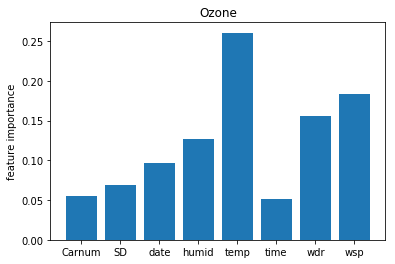

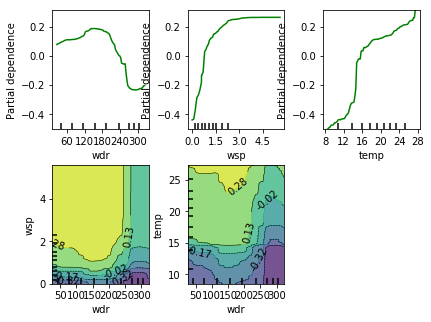

In [145]:
#Ozone
plotfeatimportances(OzoneX, Ozone_rgr, 'Ozone')
feature_names=['date', 'time', 'wdr', 'temp', 'wsp', 'humid', 'SD', 'Carnum', 'ozone']
model=Ozone_rgr
data=OzoneX
plot_partial_dependence(model, data, [2,4,3,[2,4], [2,3]], feature_names)
fig.suptitle('Partial dependence of ozone on wind direction and speed and temperature')
plt.subplots_adjust(top=1.1)

The ozone seems to be primarily dependent on the temperature and wind directions and speed. It looks like winds from the south increase the amount of ozone in the air. This is curious since the main industrial areas are located to the east and west of Earlwood and the main population area is to its north east (industry and population maps). The dependence on windspeed increases rapidly when wind increases then saturates, which might suggest that there is a constant stream of ozone coming into Earlwood from somewhere else. Dependence plots showing both the wind speed and direction show that the mean dependence comes from the wind speed. It seems like high temperatures and winds from the south are the main predictors for ozone concentration.

main industrial areas
<img src="files/industry_map.png">

population heatmap
<img src="files/population_map.png">

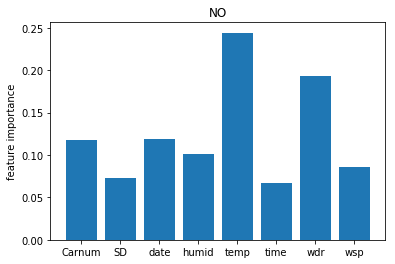

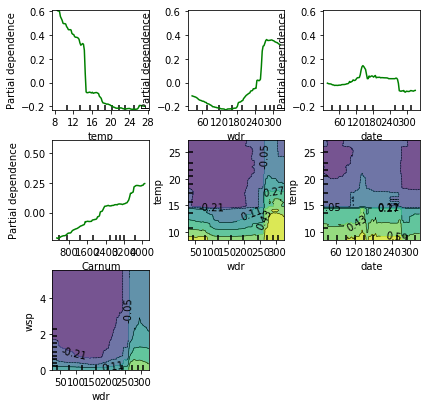

In [151]:
#NO
plotfeatimportances(NOX, NO_rgr, 'NO')
feature_names=['date', 'time', 'wdr', 'temp', 'wsp', 'humid', 'SD', 'Carnum', 'NO']
model=NO_rgr
data=NOX
plot_partial_dependence(model, data, [3,2,0,7, [2,3], [0,3], [2,4]], feature_names)
fig.suptitle('Partial dependence of NO on temperature, wind direction, time of year (date), and number of cars')
plt.subplots_adjust(top=1.4)

Again, the main dependence seems to be on the temperature and winds coming from west to north-west. Some of the main industrial areas are located in that general direction. The NO dependence sharply drops at around 14C, possibly due to heaters being used in colder temperatures. The spike we see in the dependence on the date roughly matches the the period where the lowest temperatures were attained. We can also see the increase in NO dependency with the number of cars on the roads

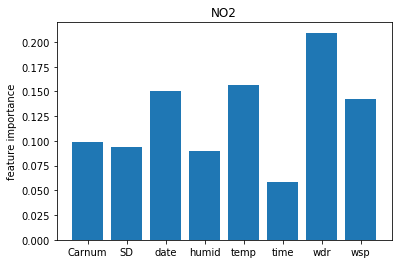

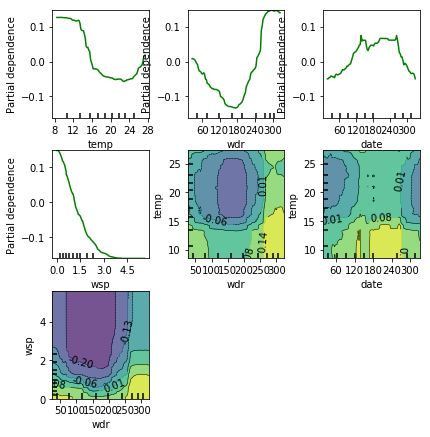

In [153]:
#NO2
plotfeatimportances(NO2X, NO2_rgr, 'NO2')

feature_names=['date', 'time', 'wdr', 'temp', 'wsp', 'humid', 'SD', 'Carnum', 'NO2']
model=NO2_rgr
data=NO2X
plot_partial_dependence(model, data, [3,2,0,4, [2,3], [0,3], [2,4]], feature_names)
fig.suptitle('Partial dependence of NO2 on temperature, wind direction, time of year (date), and number of cars')
plt.subplots_adjust(top=1.5)

The main predictors for NO2 seem to be temperature and wind direction and speed and period of the year (date). From the partial dependence plot, we see the dip in NO2 dependence for temperatures where people are comfortable living with and sharp increases above and below this range of 15-25C. This is quite possibly the signature of air-conditioning and heating units kicking in, with a stronger contribution from heating units, consistent with what is observed for NO. This is also confirmed in the partial dependence on the date as there is an increase in the winter months. Wind directions show that part of the detected NO2 could come from the industrial areas to the east and west of Earlwood. The dependence on wind decreases rapidly with wind speed which suggests that part of the detected NO2 comes from Earlwood itself. When there is no/low winds, the NO2 can in principle accumulate in the atmosphere, increasing the measured concentrations. 

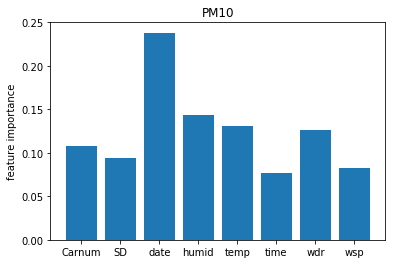

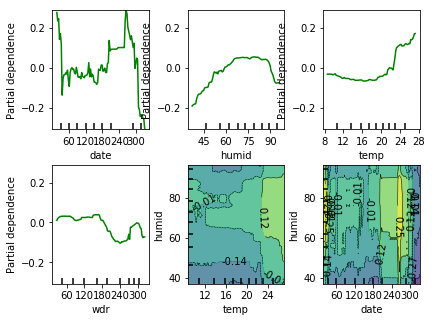

In [154]:
#PM2.5
plotfeatimportances(PM10X, PM10_rgr, 'PM10')

feature_names=['date', 'time', 'wdr', 'temp', 'wsp', 'humid', 'SD', 'Carnum', 'PM10']
model=PM10_rgr
data=PM10X
plot_partial_dependence(model, data, [0,5,3,2, [3,5], [0,5]], feature_names)
fig.suptitle('Partial dependence of PM10 on temperature, wind direction, time of year (date), and number of cars')
plt.subplots_adjust(top=1.1)

It looks like PM10 concentration increases with temperature, which is also seen with the date data, as the increase corresponds to the summer months. I am not sure if the dip at the end of the year could be due to people leaving on holidays. Though, the R^2 we obtained for PM10 and PM2.5 was quite low so there could very well be other factors strongly controlling the concentration of PM10

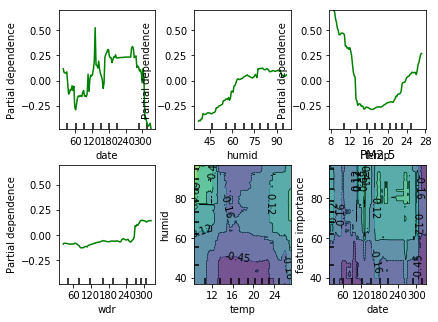

In [155]:
#PM10
feature_names=['date', 'time', 'wdr', 'temp', 'wsp', 'humid', 'SD', 'Carnum', 'PM25']
model=PM25_rgr
data=PM25X
plot_partial_dependence(model, data, [0,5,3,2, [3,5], [0,5]], feature_names)
fig.suptitle('Partial dependence of PM25 on temperature, wind direction, time of year (date), and number of cars')
plt.subplots_adjust(top=1.1)
plotfeatimportances(PM25X, PM25_rgr, 'PM2.5')

We see qualitatively similar dependences than with PM10 but with a much sharper dependence on temperature, where we see the same behaviour as for NO and NO2

Overall, our model performs decently well for NO, NO2 and ozone but less so for PM2.5 and PM10, with test R^2 of 0.78, 0.79, 0.87, 0.50 and 0.48 respectively. The Earlwood council could have an app developed that pulls forecasts from the Australian weather office and feeds it into the model to give estimates of air pollution and/or warnings to the population with reasonable accuracy. Though it is to be noted that the uncertainties in weather forecasts would then be compounded with the uncertainties of the model but it would be worthwhile to test it.

The findings made here also give some hints as to what Earlwood could do to increase air quality, namely switch the heating and cooling systems in their buildings to lower-emitting ones, upgrade the thermal insulation or encourage the public to use heating or air conditioning only when absolutely necessary. 

Also, discussions could be put forth with other communities living around industrial areas to implement policies to limit their effect on the air quality of its surroundings.

Some dependence was found on the traffic volume around Earlwood, though the way the predictor was generated could be improved by measuring traffic volume inside and around Earlwood rather than just at two points on two major roads. As is, the predictor does not take into account possible traffic jams within and around Earlwood.

Possible improvements to the model besides improving the traffic volume estimate would be to use rolling temperature averages as the pollutants seems to accumulate when temperatures are higher. Also, because we are dealing with time series data, ARIMA could be used.

